In [1]:
import textworld
from textworld.render import visualize
from textworld.challenges.cooking import make

In [34]:
from textworld.render.render import *

def take_screenshot(url: str, id: str='world'):
    """
    Takes a screenshot of DOM element given its id.
    :param url: URL of webpage to open headlessly.
    :param id: ID of DOM element.
    :return: Image object.
    """
    from PIL import Image

    driver = get_webdriver()
    driver.set_window_size(4500, 4000)

    driver.get(url)
    svg = driver.find_element_by_id(id)
    location = svg.location
    size = svg.size
    png = driver.get_screenshot_as_png()

    driver.close()
    image = Image.open(io.BytesIO(png))
    left = location['x']
    top = location['y']
    right = location['x'] + size['width']
    bottom = location['y'] + size['height']
    image = image.crop((left, top, right, bottom))
    return image


def visualize(world: Union[Game, State, GlulxGameState, World],
              interactive: bool = False):
    """
    Show the current state of the world.
    :param world: Object representing a game state to be visualized.
    :param interactive: Whether or not to visualize the state in the browser.
    :return: Image object of the visualization.
    """
    try:
        import webbrowser
        from textworld.render.serve import get_html_template
    except ImportError:
        raise ImportError('Visualization dependencies not installed. Try running `pip install textworld[vis]`')

    if isinstance(world, Game):
        game = world
        state = load_state(game.world, game.infos)
        state["objective"] = game.objective
    elif isinstance(world, GlulxGameState):
        state = load_state_from_game_state(game_state=world)
    elif isinstance(world, World):
        state = load_state(world)
    elif isinstance(world, State):
        state = world
        world = World.from_facts(state.facts)
        state = load_state(world)
    else:
        raise ValueError("Don't know how to visualize: {!r}".format(world))

    state["command"] = ""
    state["history"] = ""
    html = get_html_template(game_state=json.dumps(state))
    tmpdir = maybe_mkdir(pjoin(tempfile.gettempdir(), "textworld"))
    fh, filename = tempfile.mkstemp(suffix=".html", dir=tmpdir, text=True)
    url = 'file://' + filename
    with open(filename, 'w') as f:
        f.write(html)

    img_graph = take_screenshot(url, id="world")
    #img_inventory = take_screenshot(url, id="inventory")
    #image = concat_images(img_inventory, trim(img_graph))
    image = img_graph
    
    if interactive:
        try:
            webbrowser.open(url)
        finally:
            return image
        
    return image


In [39]:
options = textworld.GameOptions()

games = []

for k in [1, 6, 9, 12]:
    nb_maps = 1 if k == 1 else 10
    for i in range(1, nb_maps+1):
        for j in range(1, 10 + 1):
            seeds = {"map": i, "objects": j, "quest": 1, "grammar": 1, }    
            options.seeds = seeds
        
            game = make("recipe3+take3+cut+go{}".format(k), options)
            games.append(game)


In [45]:
for i, game in enumerate(games):
    img = visualize(game)
    img.save('./imgs/img_{}.png'.format(i))

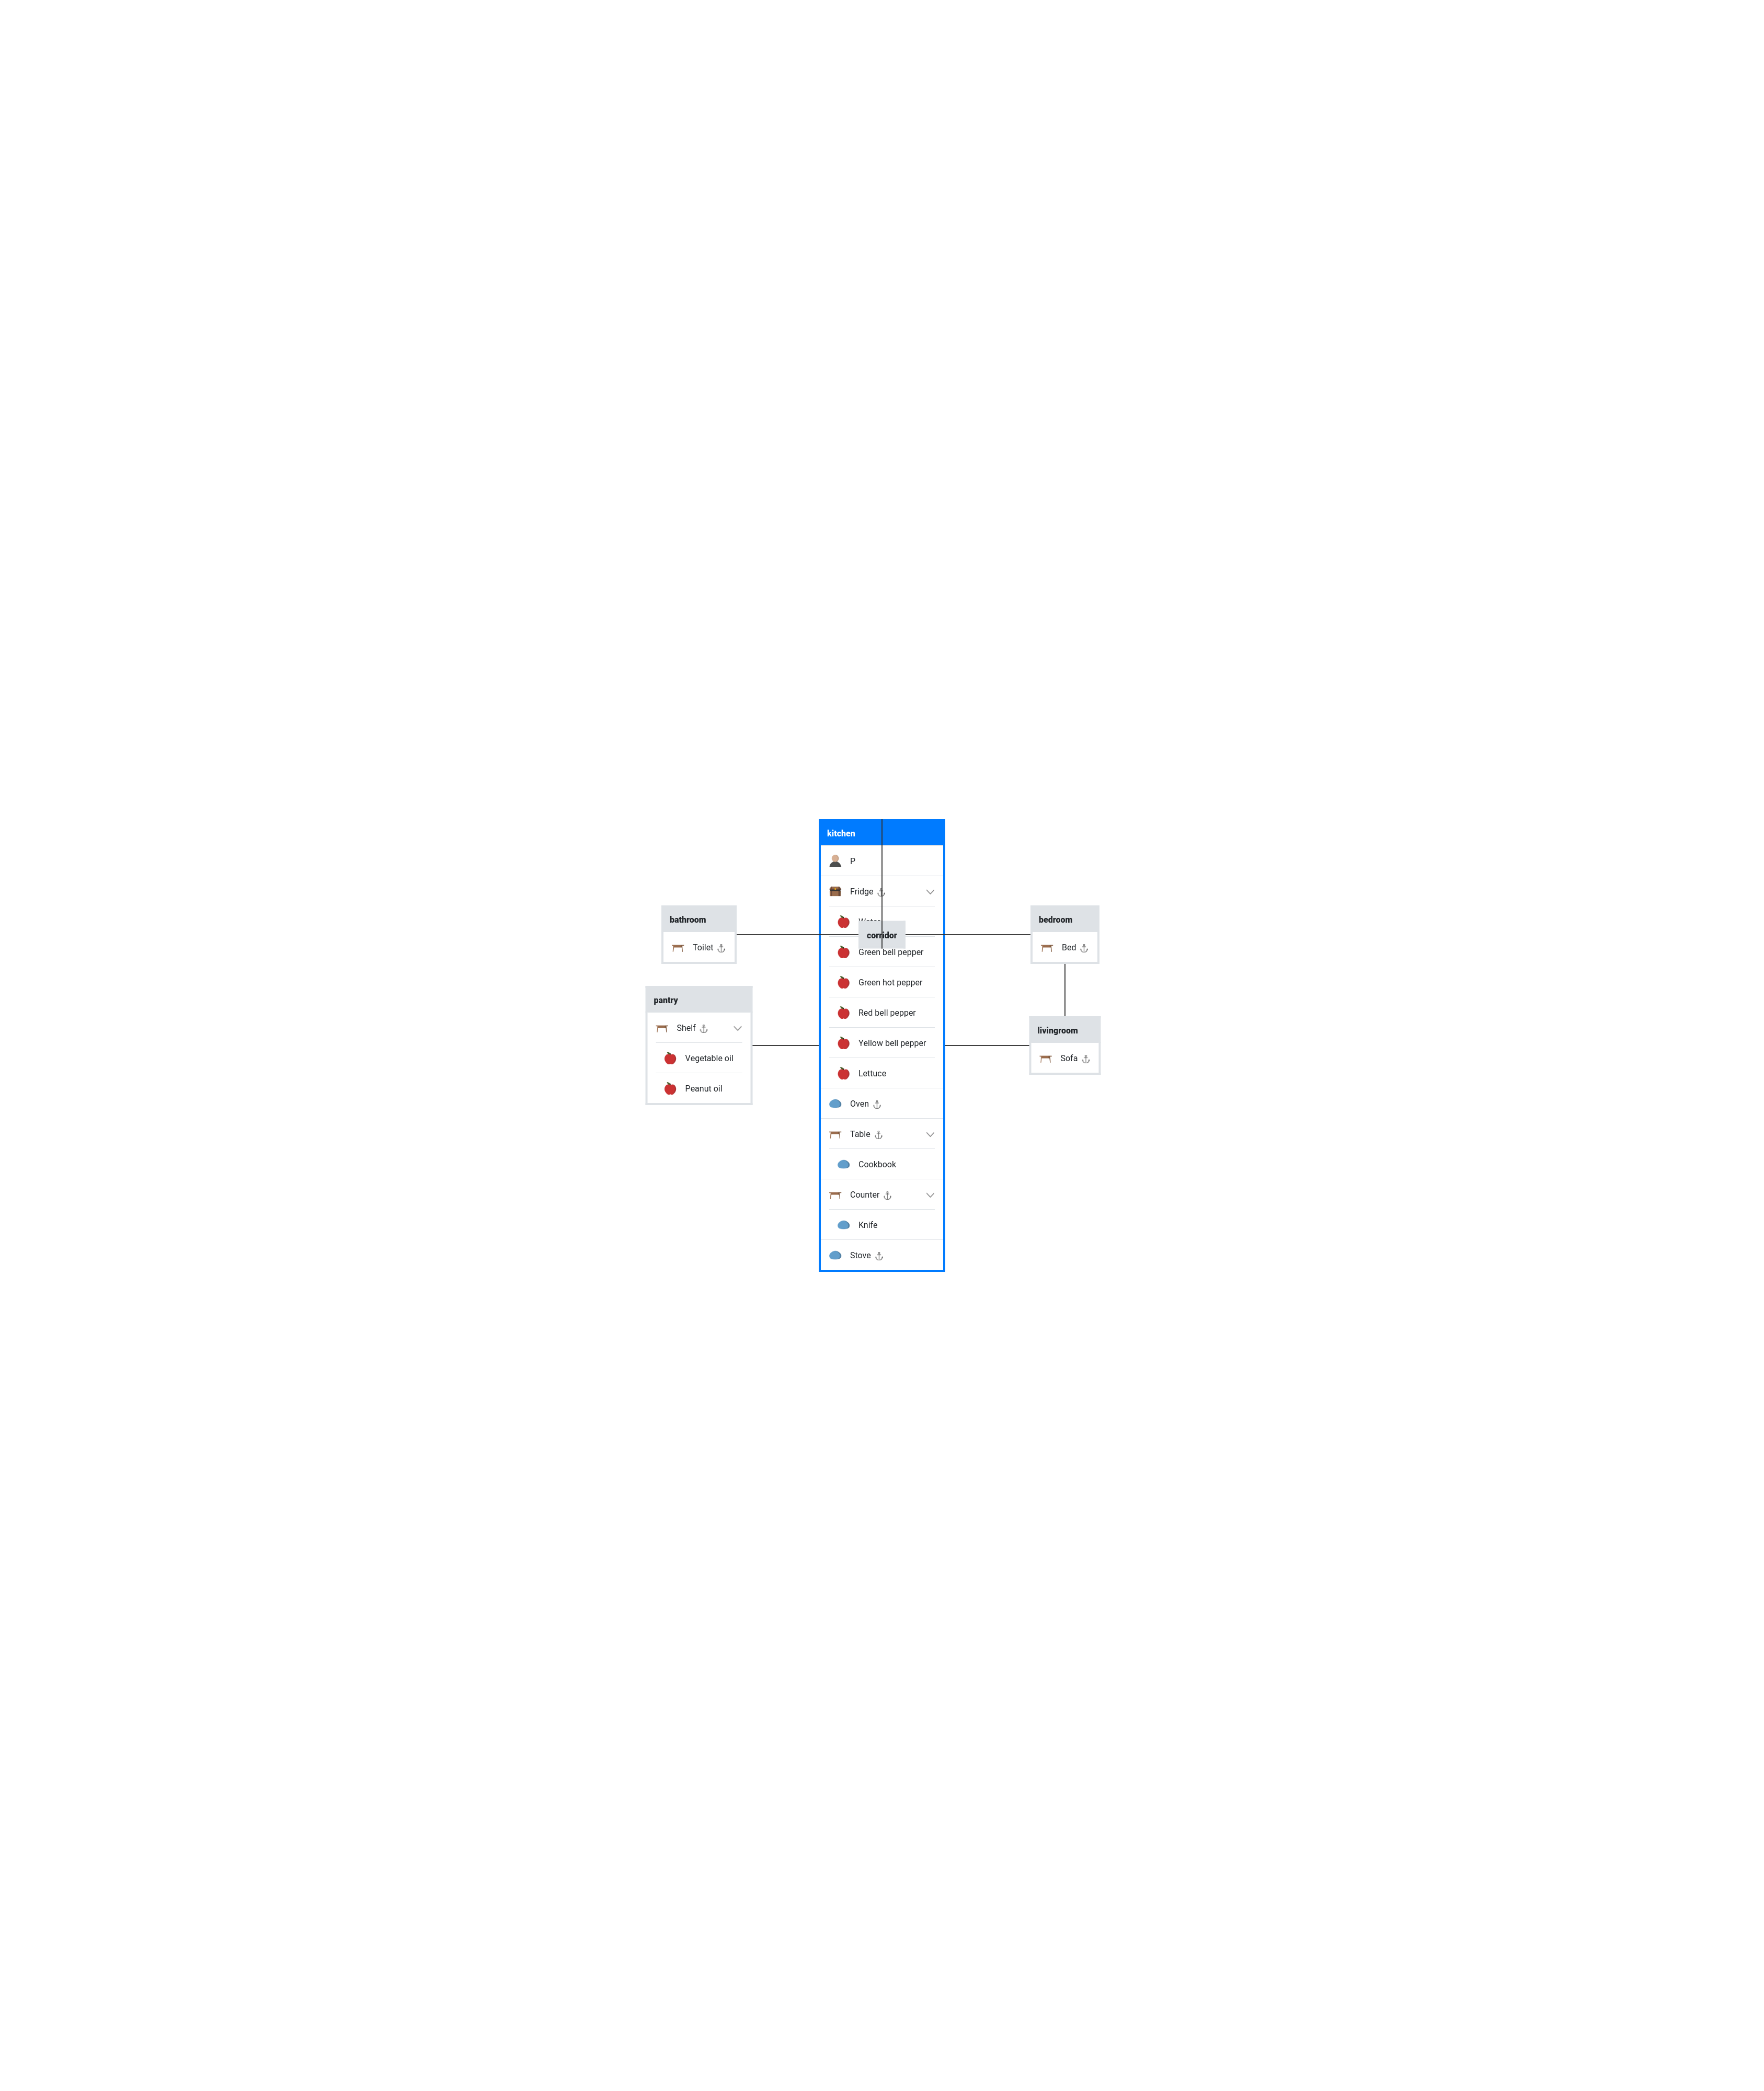

In [44]:
visualize(games[14], interactive=True)